# Market_Analytics - Campaign Budget Optimization — Visual Diagnostics & Strategic Insight
## Objective

This notebook visualizes the results of the campaign budget optimization exercise.

Rather than assuming budget reallocation always improves performance, the goal is to:
- Compare baseline vs optimized budgets
- Examine conversion efficiency distribution
- Diagnose why overall lift ≈ 0%
- Translate analytical findings into strategic insights

This supports transparent, defensible decision-making for marketing stakeholders.


In [1]:
# Step 1: Load Results Data
import pandas as pd
import matplotlib.pyplot as plt

# Load optimization results
df = pd.read_csv("../reports/budget_optimization_results.csv")

df.head()

,Ad Type,Ad Placement,Ad Topic,Location,impressions,clicks,expected_conversions,cost,revenue,CTR,...,cpc,conversions_per_dollar,spend_share,efficiency_weight,optimized_spend_share,optimized_budget,expected_clicks_optimized,expected_conversions_optimized,budget_change,conversion_efficiency_rank
0,Banner,Search Engine,Fashion,Rural,6323.065886,229,40.8934,114.5,1635.736,0.036217,...,0.5,0.357148,0.004552,0.004074,0.00463,116.449074,232.898148,41.589507,1.949074,198.0
1,Banner,Search Engine,Fashion,Suburban,6259.956920,271,54.1309,135.5,2165.236,0.043291,...,0.5,0.399490,0.005387,0.004557,0.00463,116.449074,232.898148,46.520245,-19.050926,116.0
2,Banner,Search Engine,Fashion,Urban,6822.505967,278,48.5637,139.0,1942.548,0.040747,...,0.5,0.349379,0.005526,0.003985,0.00463,116.449074,232.898148,40.684877,-22.550926,202.0
3,Banner,Search Engine,Finance,Rural,6990.525018,265,51.5156,132.5,2060.624,0.037908,...,0.5,0.388797,0.005268,0.004435,0.00463,116.449074,232.898148,45.275048,-16.050926,141.0
4,Banner,Search Engine,Finance,Suburban,5128.252635,234,50.6310,117.0,2025.240,0.045630,...,0.5,0.432744,0.004652,0.004936,0.00463,116.449074,232.898148,50.392590,-0.550926,47.0


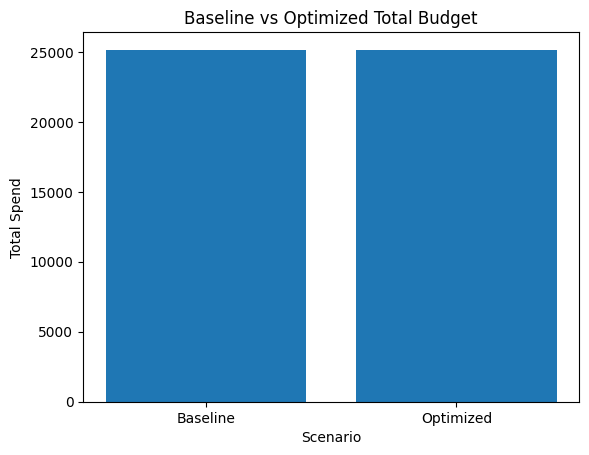

In [8]:
# Step 2: Baseline vs Optimized Budget (Bar Chart)
# Aggregate budgets
budget_summary = pd.DataFrame({
    "Budget Type": ["Baseline", "Optimized"],
    "Total Budget": [
        df["cost"].sum(),
        df["optimized_budget"].sum()
    ]
})

plt.figure()
plt.bar(
    budget_summary["Budget Type"],
    budget_summary["Total Budget"]
)
plt.title("Baseline vs Optimized Total Budget")
plt.ylabel("Total Spend")
plt.xlabel("Scenario")
plt.savefig("../visuals/baseline_vs_optimized_budget.png")
plt.show()

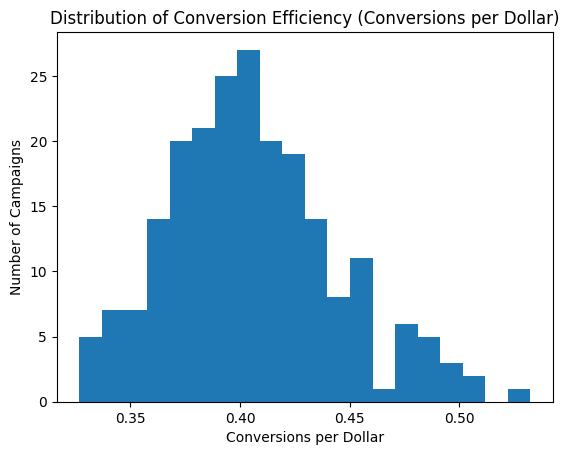

In [9]:
# Step 3: Conversion Efficiency Distribution
plt.figure()
plt.hist(
    df["conversions_per_dollar"],
    bins=20
)
plt.title("Distribution of Conversion Efficiency (Conversions per Dollar)")
plt.xlabel("Conversions per Dollar")
plt.ylabel("Number of Campaigns")
plt.savefig("../visuals/conversion_efficiency_distribution.png")
plt.show()

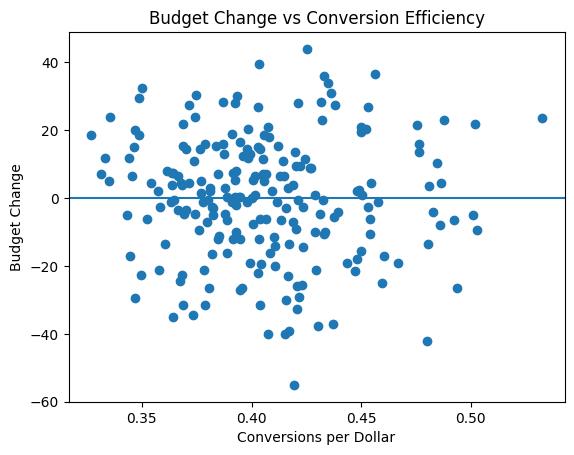

In [10]:
# Step 4: Budget Change vs Efficiency (Scatter Plot)
df["budget_change"] = df["optimized_budget"] - df["cost"]

plt.figure()
plt.scatter(
    df["conversions_per_dollar"],
    df["budget_change"]
)
plt.axhline(0)
plt.title("Budget Change vs Conversion Efficiency")
plt.xlabel("Conversions per Dollar")
plt.ylabel("Budget Change")
plt.savefig("../visuals/budget_change_vs_efficiency.png") 
plt.show()

In [5]:
# Step 5: Top vs Bottom Campaign Comparison
# Rank campaigns by efficiency
df["efficiency_rank"] = (
    df["conversions_per_dollar"]
    .rank(ascending=False)
)

top_10 = df.nsmallest(10, "efficiency_rank")
bottom_10 = df.nlargest(10, "efficiency_rank")

comparison = pd.DataFrame({
    "Group": ["Top 10", "Bottom 10"],
    "Avg Conversion Rate": [
        top_10["conversion_rate"].mean(),
        bottom_10["conversion_rate"].mean()
    ],
    "Avg Conversions per Dollar": [
        top_10["conversions_per_dollar"].mean(),
        bottom_10["conversions_per_dollar"].mean()
    ]
})

comparison

,Group,Avg Conversion Rate,Avg Conversions per Dollar
0,Top 10,0.248411,0.496822
1,Bottom 10,0.169299,0.338598


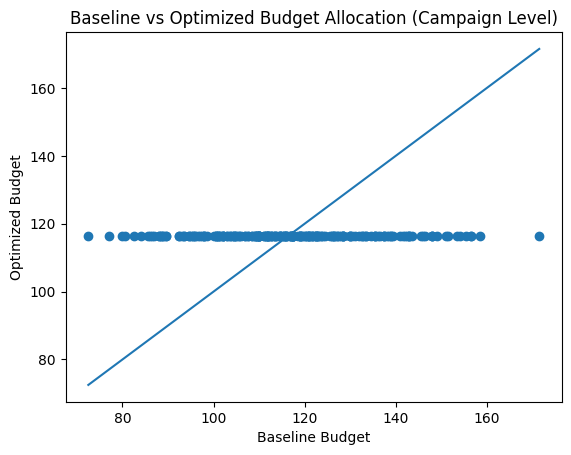

In [ ]:
# Step 6: Why Lift ≈ 0% (Visual Explanation)
plt.figure()
plt.scatter(
    df["cost"],
    df["optimized_budget"]
)
plt.plot(
    [df["cost"].min(), df["cost"].max()],
    [df["cost"].min(), df["cost"].max()]
)
plt.title("Baseline vs Optimized Budget Allocation (Campaign Level)")
plt.xlabel("Baseline Budget")
plt.ylabel("Optimized Budget")
plt.show()

## Executive Interpretation

Despite applying a rational efficiency-based reallocation strategy, total expected conversions did not increase.

This is not a modeling failure. It indicates that:

- Cost-per-click is constant across campaigns
- Conversion efficiency differences are relatively small
- Historical budget allocation was already near-optimal

### Strategic Implication
Future gains are more likely to come from:
- Improving conversion rates (creative, targeting, UX)
- Reducing CPC (bidding strategy, channel mix)
- Campaign experimentation rather than budget reshuffling

Budget optimization is most powerful when inefficiencies exist.